 In this task, we will summarize all the codes we have mentioned in previous task. You are required to fill the missing
 parts of the codes of this template by the end of this class. 

## Section 2: Create network via the geographic data

In [18]:
import geopandas as gpd
import momepy
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools


In [47]:
# Please read the data in the folder rivernetwork. 
#gpd_data = gpd.read_file( "/Users/rileybla/Desktop/CIE500Classmaterials/week6/rivernetwork/networkoregon.shp")
gpd_data=gpd.read_file("/Users/rileybla/Desktop/CIE500_SP2025/Project/bufriv2.shp")

c:\Users\rileybla\AppData\Local\miniconda3\envs\RBBenv\Lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(


In [48]:
# Visualize the data structure of the geopandas data
gpd_data.head()

,permanent_,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_per,ftype,fcode,mainpath,innetwork,visibility,Enabled,Shape_Leng,geometry
0,118010571,2019-12-12,2,None,None,0.441526,04270101007646,1,None,460,46003,0,1,24000,1,0.003953,"LINESTRING Z (-78.98065 42.98457 0, -78.98078 ..."
1,118009743,2019-12-12,2,None,None,0.110170,04270101002356,1,118018241,558,55800,0,1,24000,1,0.001221,"LINESTRING Z (-78.69365 43.02189 0, -78.6926 4..."
2,118006987,2019-12-12,2,00945122,Bull Creek,0.043201,04270101001235,1,118017307,558,55800,0,1,500000,1,0.000422,"LINESTRING Z (-78.79215 43.12421 0, -78.79228 ..."
3,118015013,2019-12-12,2,00948835,Durkee Creek,1.666423,04270101007647,1,None,460,46003,0,1,100000,1,0.018336,"LINESTRING Z (-78.4474 42.87736 0, -78.44797 4..."
4,118010875,2019-12-12,2,None,None,1.013274,04270101007298,1,None,460,46003,0,1,250000,1,0.010765,"LINESTRING Z (-78.93042 42.97848 0, -78.93064 ..."


In [49]:
# using the geopands.explode function to explode multi-line into multiple  single line. 
gpd_data_exploded = gpd_data.explode(ignore_index=True, index_parts=False)

In [50]:
# Now convert the gpd data into networkx via momepy
G = momepy.gdf_to_nx(
    gpd_data_exploded,
    approach="primal",
    multigraph=False,
    directed=False,
    length="length",
)
G.remove_edges_from(nx.selfloop_edges(G))

#directed iterate and determine if direction is correct
# iterate ovr gpd and maybe dont use mompy

c:\Users\rileybla\AppData\Local\miniconda3\envs\RBBenv\Lib\site-packages\momepy\utils.py:352: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


c:\Users\rileybla\AppData\Local\miniconda3\envs\RBBenv\Lib\site-packages\networkx\drawing\nx_pylab.py:315: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


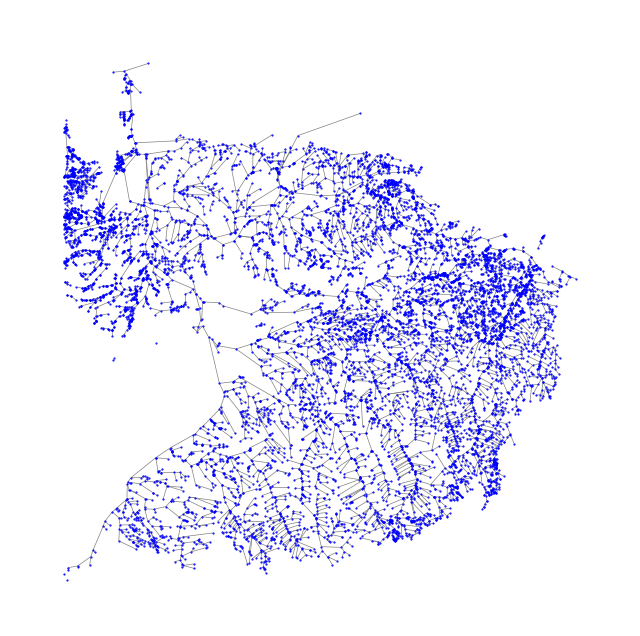

In [51]:
pos = {node: node for node in G.nodes()}
#pos={node: (coords[0], coords[1]) for node, coords in pos.items()}
pos1={node: (coords[0], coords[1]) for node, coords in pos.items() if -79.2 <= coords[0] <= -78}
remove_nodes = [i for i in list(G.nodes()) if i not in list(pos1.keys())]
G.remove_nodes_from(remove_nodes)
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx(
    G,
    pos=pos1,
    width=0.5,
    with_labels=False,
    node_color="blue",
    edge_color="gray",
    arrowsize =0.3,
    node_size=0.3,
)

ax.axis("off")  # remove the frame of the generated figure
plt.show()

In [52]:
# Count the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
# Filter the nodes based on the latitude (x coordinate)
filtered_nodes = {node: pos[node] for node in G.nodes() if -79.2 <= pos[node][0] <=-78}

# Create a subgraph with the filtered nodes
filtered_G = G.subgraph(filtered_nodes.keys())

# Count the number of nodes and edges in the filtered graph
num_filtered_nodes = filtered_G.number_of_nodes()
num_filtered_edges = filtered_G.number_of_edges()

print(f"Number of filtered nodes (-79.2 <= lat <= -78): {num_filtered_nodes}")
print(f"Number of filtered edges (-79.2 <= lat <= -78): {num_filtered_edges}")

Number of nodes: 9880
Number of edges: 10027
Number of filtered nodes (-79.2 <= lat <= -78): 9880
Number of filtered edges (-79.2 <= lat <= -78): 10027


NetworkXError: Node 1 has no position.

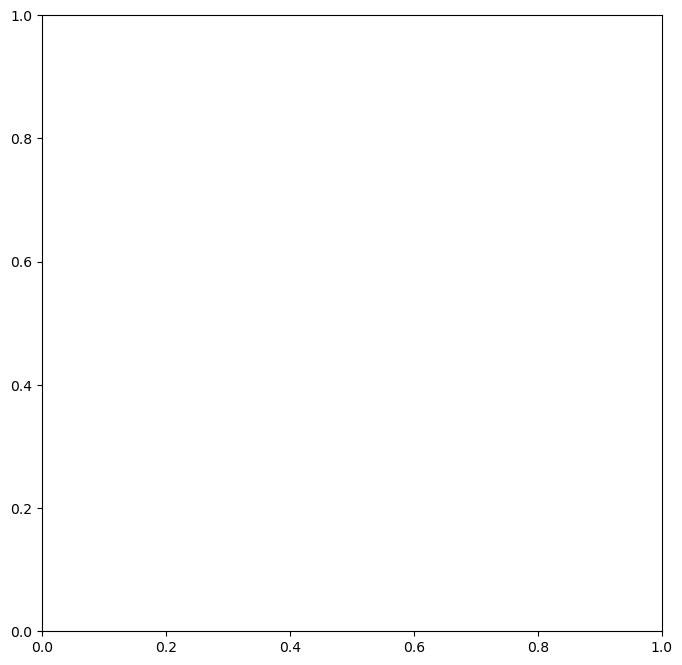

In [124]:
# Filter positions to keep only nodes with longitude between -79.2 and -78.3
filtered_pos = {node: (coords[0], coords[1]) for node, coords in pos.items() if -79.2 <= coords[0] <= -78.3}

# Remove the nodes with longitude outside the range (-79.2, -78.3)
nodes_to_remove = [node for node, coords in pos.items() if not (-79.2 <= coords[0] <= -78.3)]
G.remove_nodes_from(nodes_to_remove)

# Visualize the network with the filtered nodes
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx(
    G,
    pos=filtered_pos,
    width=1,
    with_labels=False,
    node_color="blue",
    edge_color="gray",
    node_size=1,
)
ax.axis("off")  # remove the frame of the generated figure
plt.show()


In [29]:
node_labels = {node: idx + 1 for idx, node in enumerate(G.nodes())}
node_labels

{(-78.98064938784665, 42.984569333279296, 0.0): 1,
 (-78.98077912117975, 42.98852053327312, 0.0): 2,
 (-78.69364998829212, 43.02189366655466, 0.0): 3,
 (-78.69260405496038, 43.021263933222315, 0.0): 4,
 (-78.79214905480592, 43.12420826639584, 0.0): 5,
 (-78.79233132147226, 43.1238752663964, 0.0): 6,
 (-78.44739998867436, 42.87736000011233, 0.0): 7,
 (-78.46002272198808, 42.882581200104255, 0.0): 8,
 (-78.9304209212579, 42.97847899995537, 0.0): 9,
 (-78.93829792124569, 42.9768479999579, 0.0): 10,
 (-78.5117132552412, 42.96302566664605, 0.0): 11,
 (-78.52055198856078, 42.96039399998347, 0.0): 12,
 (-78.63698698838004, 43.06091699982744, 0.0): 13,
 (-78.66738498833286, 43.054879066503474, 0.0): 14,
 (-78.43934098868687, 42.93212800002732, 0.0): 15,
 (-78.44050078868503, 42.931995066694185, 0.0): 16,
 (-78.73654698822554, 43.116323066408086, 0.0): 17,
 (-78.73639845489242, 43.11627886640815, 0.0): 18,
 (-78.24914625564872, 42.90494106673623, 0.0): 19,
 (-78.24806852231706, 42.9064096000672

In [53]:
## Calculate Network Charcteristics
#print(
#    f"The adjancency matrix of G is \n {nx.adjacency_matrix(G, nodelist=list(range(1,9))).toarray()}"
#)
# get the topological sort order of the graph.
sorted_order = list(nx.topological_sort(G))
print(f"the sorted order is {sorted_order}")

print(
    f"the length of sorted order is {len(sorted_order)}\n the total number of nodes is {len(G.nodes())}"
)



NetworkXError: Topological sort not defined on undirected graphs.

In [55]:
#Find the diameter of the network
try:
    diameter = nx.diameter(G.to_undirected())  # Convert to undirected to handle diameter computation
    print("Diameter of the network:", diameter)
except nx.NetworkXError:
    print("Graph is not connected, diameter is not defined.")


Graph is not connected, diameter is not defined.


ValueError: 'vertices' must be 2D with shape (N, 2), but your input has shape (2, 3)

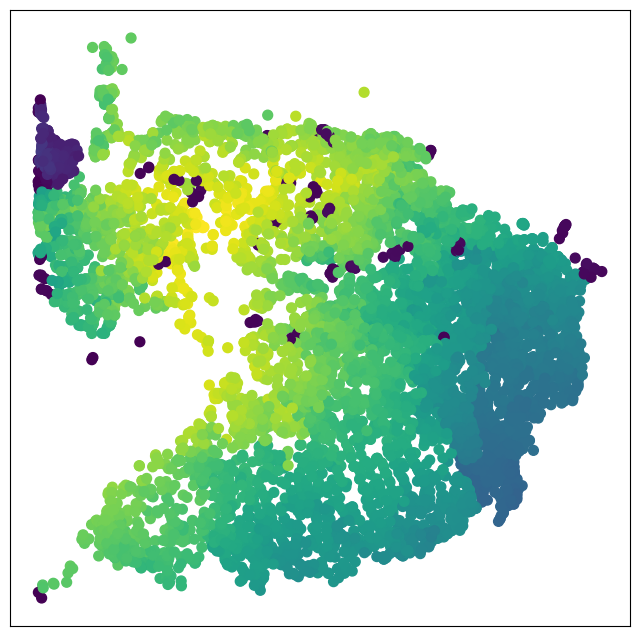

In [59]:
#Closeness centrality

node_clossness = nx.closeness_centrality(G)

fig, ax = plt.subplots(figsize=(8, 8))

nx.draw_networkx(
    G,
    pos=pos,
    with_labels=True,
    node_color=list(node_clossness.values()),
    node_size=50,
    font_size=16,
)
ax.axis("off")  # remove the frame of the generated figure
plt.show()

In [57]:
# Get the degree of each node
node_degrees = dict(G.degree())

# Find the node with the highest degree
max_degree_node = max(node_degrees, key=node_degrees.get)
max_degree = node_degrees[max_degree_node]

print(f"Node with the highest degree: {max_degree_node}")
print(f"Highest degree: {max_degree}")


Node with the highest degree: (-78.98077912117975, 42.98852053327312, 0.0)
Highest degree: 4


In [54]:
# Create a mapping of nodes to new labels starting from 1
node_labels = {node: idx + 1 for idx, node in enumerate(G.nodes())}

# Create a reverse mapping to get the original node identifiers from the new labels
reverse_node_labels = {v: k for k, v in node_labels.items()}

# Get the original nodes in the order of new labels
nodelist = list(node_labels.keys())  # This is the correct order for nodelist

# Get the adjacency matrix using the correct original node identifiers in the nodelist
adj_matrix = nx.adjacency_matrix(G, nodelist=nodelist).toarray()
print(f"The adjacency matrix of G is \n{adj_matrix}")

# Get the topological sort order of the graph using the original nodes
sorted_order = list(nx.topological_sort(G))
sorted_order_labeled = [node_labels[node] for node in sorted_order]  # Convert to new labels
print(f"The sorted order of nodes is: {sorted_order_labeled}")

# Print the length of the sorted order and the total number of nodes
print(f"Length of sorted order: {len(sorted_order_labeled)}\nTotal number of nodes: {len(G.nodes())}")


The adjacency matrix of G is 
[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


NetworkXError: Topological sort not defined on undirected graphs.

In [33]:
import urllib
import pandas as pd
##https://dashboard.waterdata.usgs.gov/app/nwd/en/
args = {
    'site_no': '04218000', # Tonawanda creek at Rapids NY
    'begin_date': '1990-10-01',
    'end_date': '2025-03-10'
}
args = {
    'site_no': '04218518', # Ellicott Creek Below williamsville NY
    'begin_date': '1990-10-01',
    'end_date': '2025-03-11'
}
args = {
    'site_no': '0421418', # Tonawanda creek at attica NY
    'begin_date': '1990-10-29',
    'end_date': '2025-03-11'
}
args = {
    'site_no': '04217000', # Tonawanda creek at Batavia NY
    'begin_date': '1990-10-01',
    'end_date': '2025-03-11'
}

args = {
    'site_no': '04215000', # Cayuga creek near lancaster NY
    'begin_date': '1990-10-01',
    'end_date': '2025-03-11'
}

args = {
    'site_no': '04214500', # Buffalo Creek at Gardenville NY
    'begin_date': '1990-10-01',
    'end_date': '2025-03-11'
}

args = {
    'site_no': '04215500', # Cazenovia Crek at Ebenezer NY
    'begin_date': '1990-10-01',
    'end_date': '2025-03-11'
}
args = {
    'site_no': '0421422210', # Eighteenmile creek at Hamburg NY
    'begin_date': '2017-09-22',
    'end_date': '2025-03-11'
}
args = {
    'site_no': '04214060', # Big sister creek at evans center NY
    'begin_date': '2017-09-22',
    'end_date': '2025-03-11'
}
args = {
    'site_no': '04214231', # S BR eighteenmile cr at bley rd at eden valley
    'begin_date': '2017-09-22',
    'end_date': '2025-03-11'
}
query = urllib.parse.urlencode(args)
verde_url = (
    f'https://waterdata.usgs.gov/nwis/dv?'
    f'cb_00060=on&format=rdb&referred_module=sw&{query}'
)
response = urllib.request.urlopen(verde_url)
df1 = pd.read_table(
    response,
    comment='#',
    sep='\s+',
    names=['agency', 'site', 'date', 'streamflow', 'quality_flag'],
    index_col=2,
    parse_dates=True,
    date_format='yyyy-mm-dd',
    engine='python')
# discard the first two rows
df1 = df1.iloc[2:]
# Now convert the streamflow data to floats and
# the index to datetimes. When processing raw data
# it's common to have to do some extra postprocessing
df1['streamflow'] = df1['streamflow'].astype(np.float64)
df1.index = pd.DatetimeIndex(df1.index)

# we calculated the annual peak flow for the St Lawrence River
#st_law_peakflow = df1[['streamflow']].groupby(df1.index.year).max()
#st_law_peakflow.columns = ['peakflow_cfs']
df1

<>:66: SyntaxWarning: invalid escape sequence '\s'
<>:66: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rileybla\AppData\Local\Temp\ipykernel_18880\1506536076.py:66: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


,agency,site,streamflow,quality_flag
date,,,,
2017-09-22,USGS,04214231,4.92,A
2017-09-23,USGS,04214231,4.49,A
2017-09-24,USGS,04214231,4.28,A
2017-09-25,USGS,04214231,4.23,A
2017-09-26,USGS,04214231,3.95,A
...,...,...,...,...
2025-03-06,USGS,04214231,470.00,P
2025-03-07,USGS,04214231,NaN,None
2025-03-08,USGS,04214231,47.30,P


In [41]:
import urllib.request
import urllib.parse
import pandas as pd
import numpy as np

# Define the input parameters (start date, end date)
args = {
    'site': 'KBUF',  # Example site, Buffalo (KBUF)
    'hours': 720,
    'units': 'english',
    'chart': 'off',
    'headers': 'none',
    'obs': 'tabular',
    'hourly': 'true',
    'pview': 'standard',
    'font': 12,
    'history': 'yes',
    'start': '20041106',  # Example start date
    'end': '20250306',    # Example end date
    'plot': ''
}

# Build the URL with the query parameters
query = urllib.parse.urlencode(args)
weather_url = f'https://www.weather.gov/wrh/timeseries?{query}'
#https://www.weather.gov/wrh/timeseries?site=KBUF&hours=29&units=english&chart=on&headers=on&obs=tabular&hourly=false&pview=standard&font=12&history=yes&start=20241106&end=20241106
# Send the request to the URL
response = urllib.request.urlopen(weather_url)

# Read the response as a DataFrame using pandas
try:
    df1 = pd.read_table(
        response,
        comment='#',  # Skip lines starting with '#'
        sep='\s+',  # Split by whitespace
        names=['date', 'time', 'temperature', 'dew_point', 'wind_speed', 'precipitation', 'pressure'],  # Adjust column names based on the data
        index_col=0,  # Assuming date is the index
        parse_dates=True,
        engine='python',
        on_bad_lines='skip'  # Skip malformed lines
    )
except Exception as e:
    print(f"Error reading the data: {e}")

# If the data was successfully loaded, clean it
if 'df1' in locals():
    # Discard any rows with incomplete data (if any)
    df1 = df1.dropna()

    # Convert the 'temperature' column to numeric values
    df1['temperature'] = pd.to_numeric(df1['temperature'], errors='coerce')

    # Convert the index (date) to datetime format
    df1.index = pd.to_datetime(df1.index, format='%Y-%m-%d')

    # Show the DataFrame (first few rows for inspection)
    print(df1.head())



<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rileybla\AppData\Local\Temp\ipykernel_18880\3440035134.py:35: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',  # Split by whitespace
C:\Users\rileybla\AppData\Local\Temp\ipykernel_18880\3440035134.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = pd.read_table(
C:\Users\rileybla\AppData\Local\Temp\ipykernel_18880\3440035134.py:35: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',  # Split by whitespace


ValueError: time data "<!DOCTYPE" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Finding the shortest path

# Use Bellman-Ford to find the shortest path from node 1 to node 6
try:
    # Get the shortest path from node 1 to all other nodes
    path = nx.single_source_bellman_ford_path(G, source=1)

    # If node 6 is in the paths, print the path
    if 6 in path:
        print(f"The shortest path from node 1 to node 6 is: {path[6]}")
    else:
        print("There is no path from node 1 to node 6.")
except nx.NetworkXUnreachable:
    print("The graph is not connected between node 1 and node 6.")

#Find the diameter of the network
try:
    diameter = nx.diameter(G.to_undirected())  # Convert to undirected to handle diameter computation
    print("Diameter of the network:", diameter)
except nx.NetworkXError:
    print("Graph is not connected, diameter is not defined.")

# %%
# Betweenness centrality

node_central = nx.betweenness_centrality(G)

fig, ax = plt.subplots(figsize=(5, 8))

nx.draw_networkx(
    G,
    pos=pos,
    with_labels=True,
    node_color=list(node_central.values()), # make heat scale red to yellow with increasing conectedness
    node_size=400,
    font_size=16,
)
ax.axis("off")  # remove the frame of the generated figure
#plt.savefig(
#    "/Users/rileybla/Desktop/CIE500_SP2025/betweenness.jpg",
#    dpi=600,
#    bbox_inches="tight",
#)
plt.show()

#Closeness centrality

node_clossness = nx.closeness_centrality(G)

fig, ax = plt.subplots(figsize=(5, 8))

nx.draw_networkx(
    G,
    pos=pos,
    with_labels=True,
    node_color=list(node_clossness.values()),
    node_size=400,
    font_size=16,
)
ax.axis("off")  # remove the frame of the generated figure
plt.show()

## Section 3: Create network via hydraulic model

Most common hydraulic models developed by US EPA is the EPANET and SWMM. Both files use an inp format. Each model has a
corresponding python package, i.e., the wntr and swmmio. We will visualize both models using networkx in this class. 

Install the wntr and pyswmm in your computer:

pip install wntr

pip install swmmio

In [17]:
from swmmio import Model
import networkx as nx

In [18]:
#model = Model('/Users/rileybla/Desktop/CIE500_SP2025/Drainage_Example.inp')
model=Model('/Users/rileybla/Desktop/BSA/SWMM/BSA_2017_2023Conditions_AnnualSimulation_TY_01-01011993-01011994.inp')
G = model.network
pos = {}
for node in G.nodes():
    pos[node] = G.nodes[node]['geometry']['coordinates']

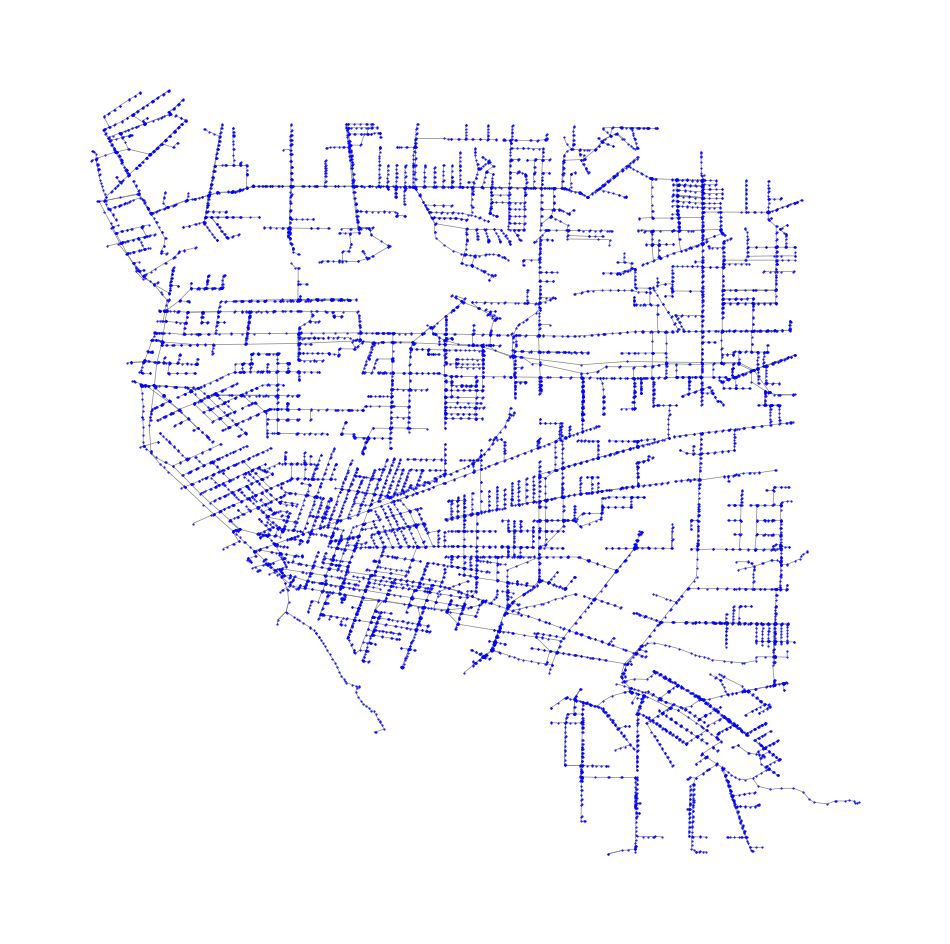

In [22]:
# Plot the drainage system in this cell
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw_networkx(
    G,
    pos=pos,
    width=0.5,
    with_labels=False,
    node_color="blue",
    edge_color="gray",
    arrowsize =0.3,
    node_size=0.3,
)

ax.axis("off")  # remove the frame of the generated figure
plt.show()

We also have the graph conversion tool for the hydraulic system

In [24]:
import wntr

wn = wntr.network.WaterNetworkModel("/Users/rileybla/Desktop/CIE500_SP2025/Drinking_example.inp")

wn =wntr.network.io.to_graph(wn)

pos = {}
for node in wn.nodes():
    pos[node]  = wn.nodes[node]['pos']


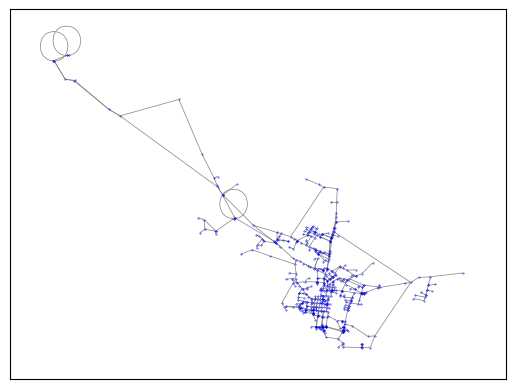

In [26]:
nx.draw_networkx(wn,
    pos=pos,
    width=0.5,
    with_labels=False,
    node_color="blue",
    edge_color="gray",
    arrowsize = 0.5,
    node_size=0.1,)

In [ ]:
#dbf to shp
C:\Users\rileybla\Desktop\CIE500_SP2025\Project\rivertable.dbf